In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import acgan
import tqdm
import twodlearn as tdl
import tensorflow as tf
import tensorflow_datasets as tfds
from functools import reduce
import matplotlib.pyplot as plt
BATCH_SIZE = 128
#acgan.data.DATA_DIR = '/data/marinodl/tensorflow_datasets'
session = tf.InteractiveSession()


In [2]:
#tfds.list_builders()

In [3]:
dataset = acgan.data.load_celeb_a(BATCH_SIZE)
input_shape = dataset.output_shapes.as_list()
print('input shape: {}'.format(input_shape))

Instructions for updating:
Colocations handled automatically by placer.


W0329 22:08:02.941584 140389435586368 deprecation.py:323] From /home/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


input shape: [None, 64, 64, 3]


In [4]:
model = acgan.model.DCGAN(
    embedding_size=256,
    generator={'init_shape':(4, 4, 1024),
               'units': [516, 256, 128, 3],
               'kernels': 5,
               'strides': 2,
               'padding': ['same', 'same', 'same', 'same']},
    discriminator={'units':[128, 256, 512, 1024],
                   'kernels':5,
                   'strides':2,
                   'dropout':None}
)
# model.noise_rate.init(rate=0.001)
print('output shape: {}'.format(
    model.generator.compute_output_shape(
        input_shape=[None, 100])))

output shape: (?, 64, 64, 3)


In [5]:
iter = dataset.make_one_shot_iterator()
xreal = iter.get_next()

gen = model.generator_trainer(BATCH_SIZE, learning_rate=0.0002)
dis = model.discriminator_trainer(BATCH_SIZE, xreal=xreal, learning_rate=0.0002)

Instructions for updating:
Use tf.cast instead.


W0329 22:08:03.820867 140389435586368 deprecation.py:323] From /home/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


W0329 22:08:03.855129 140389435586368 deprecation.py:323] From /home/marinodl/research/2019/AssociativeGAN/env/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [6]:
tdl.core.variables_initializer(gen.variables).run()
tdl.core.variables_initializer(dis.variables).run()
#tf.global_variables_initializer().run()

In [7]:
print('step {} | dis {} | gen {}'.format(dis.train_step.eval(), dis.loss.eval(), gen.loss.eval()) )

step 0 | dis 0.6931612491607666 | gen 0.6931819915771484


In [43]:
acgan.train.run_training(dis=dis, gen=gen, n_steps=1500, n_logging=10)

step 18107 | dis 7.9712 | gen 0.0000 : : 3003it [12:24,  4.05it/s]


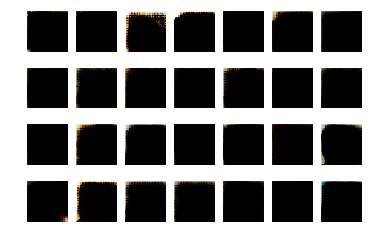

In [44]:
import matplotlib.pyplot as plt
import numpy as np
xsim = dis.xsim.eval()
for i in range(4*7):
    plt.subplot(4,7, i+1)
    plt.imshow(np.squeeze((xsim[i][:,:,:]+1)*0.5))
    plt.axis('off')